In [1]:
import os
import os.path as osp
import mmcv
import numpy as np
import matplotlib.pyplot as plt
import sys
import PIL
os.chdir('/home/damon/Github/mmlab/mmdetection/')
%load_ext autoreload
%autoreload 2
sys.path.append('/home/damon/detorch/')
from visdrone.utils import result_utils
from visualization_utils import *
from debug_utils import *

swap = lambda b: np.stack([b[:, 1], b[:, 0], b[:, 3], b[:, 2]], 1)

In [4]:
from numpy import random
colors = list(PIL.ImageColor.colormap.keys())
img_dir = '/home/damon/DATASETS/Drone2019/VisDrone2019-DET/VisDrone2018-DET-test-challenge/images/'
res_dir = '/tmp/testpatch_casv2/'

(441, 5)


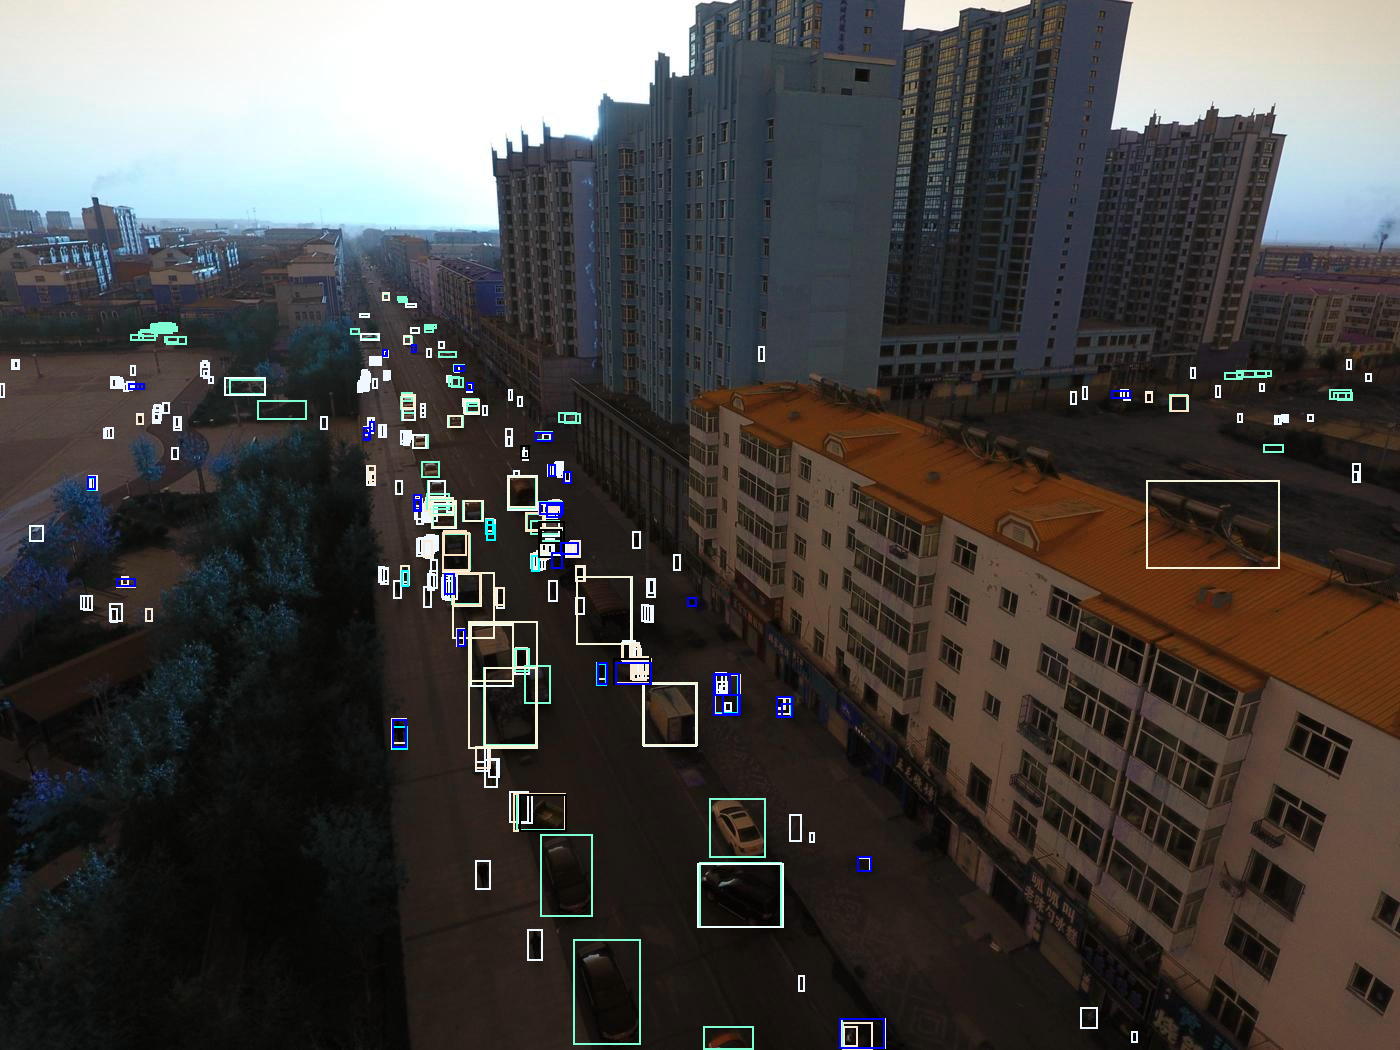

In [38]:
img_list = os.listdir(img_dir)
img = random.choice(img_list)
res = img.replace('.jpg','.txt')
res = osp.join(res_dir, res)
img = mmcv.imread(osp.join(img_dir, img))
det = result_utils.single_txt2det(res)
disp_thr = 0.0

ret = np.copy(img)
for i, bb in enumerate(det):
    bb = bb[bb[:, -1] > disp_thr]
    ret = draw_bounding_boxes_on_image_array(ret, swap(bb), color=colors[i], thickness=2)
print(np.concatenate(det, 0).shape)
visualize_image_array(ret)

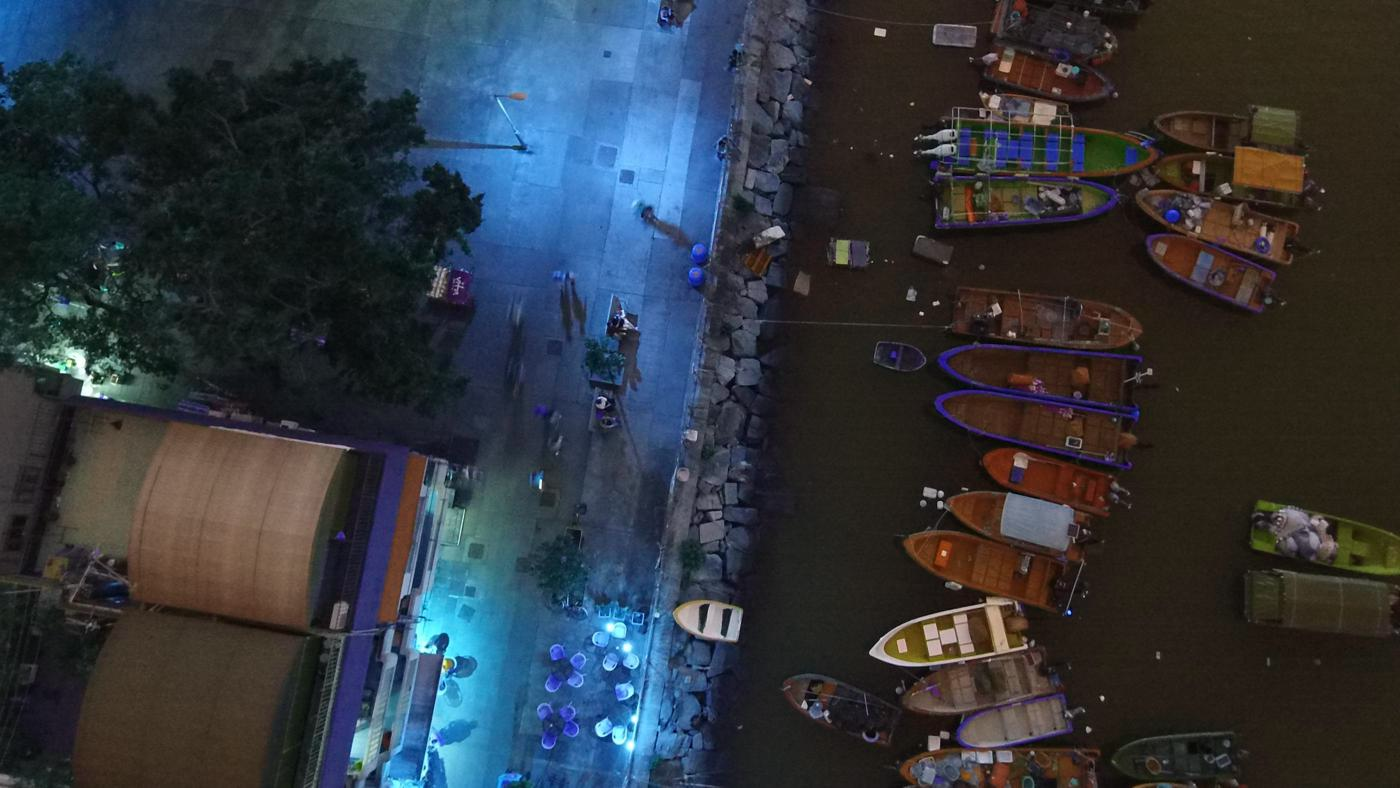

In [8]:
visualize_image_array(img)